# [IAPR 2019:][iapr2019] Lab 2 ‒  Object description

**Author:** Emmanuel Nieto  
**Due date:** 19.04.2019

[iapr2019]: https://github.com/LTS5/iapr-2019

## Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Description
In the `lab-02-data/` folder, you will find 28x28 grey-scale pictures of handwritten "0" and "1".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

Your goal is to extract, from each of those images, a 2-dimensional feature vector (i.e. 2 features) and to plot them all on a 2D graph.
If you have chosen good features, the vectors of the "0"'s should nicely cluster in one part of the plane and those of the "1"'s in another.

Please try first the Fourier Descriptors.
You can make several attempts: e.g. with and without invariance to rotation, translation, scaling, etc.
You can also for instance rotate the images and assess the invariance in rotation.

**Note:** for the Fourier descriptors, the u_k signal has to be constructed by following the contour point after point.
Some pre-processing (image binarization, possibly some Mathematical Morphology) might be useful.

Then feel free to try other features, the more you try, the better it will be (for you).

### 1.1 Data visualization

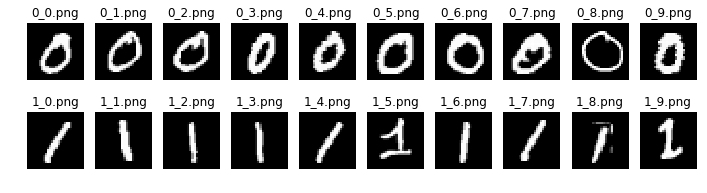

In [2]:
import skimage.io
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from copy import deepcopy
%matplotlib inline

# Load images
data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
#  Load zeros
zeros_path = os.path.join(data_base_path, data_folder, '0')
zeros_names = [nm for nm in os.listdir(zeros_path) if '.png' in nm]  # make sure to only load .png
zeros_names.sort()  # sort file names
ic = skimage.io.imread_collection([os.path.join(zeros_path, nm) for nm in zeros_names])
zeros_im = skimage.io.concatenate_images(ic)
#  Load ones
ones_path = os.path.join(data_base_path, data_folder, '1')
ones_names = [nm for nm in os.listdir(ones_path) if '.png' in nm]  # make sure to only load .png
ones_names.sort()  # sort file names
ic = skimage.io.imread_collection(([os.path.join(ones_path, nm) for nm in ones_names]))
ones_im = skimage.io.concatenate_images(ic)

# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 1.2 Fourier descriptors
Add your implementation and discussion

I start by filtering the image to get the edges as they are pretty sharp, then the images can be binarized 

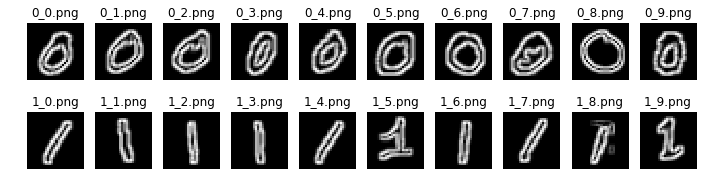

In [3]:
zim=np.array(deepcopy(zeros_im))
oim=np.array(deepcopy(ones_im))
zim2=zim.astype("int")#cast to complete ints
oim2=oim.astype("int")

n_im=len(zeros_im)

h1= [[1,2,1],[0,0,0],[-1,-2,-1]]
h2= [[0,1,2],[-1,0,1],[-2,-1,0]]
h3= [[-1,0,1],[-2,0,2],[-1,0,1]]
h4= [[2,1,0],[1,0,-1],[0,-1,-2]]

h5= [[2,1,0],[1,0,-1],[0,-1,-2]]

fig, axes = plt.subplots(2, n_im, figsize=(12, 3))
for ax, im, nm, a1 in zip(axes[0], zeros_im, zeros_names,range(0,n_im)):
    
    out1 = np.absolute(signal.convolve2d(im,h1,mode='same'))
    #out2 = np.absolute(signal.convolve2d(im,h2))
    out3 = np.absolute(signal.convolve2d(im,h3,mode='same'))
    #out4 = np.absolute(signal.convolve2d(im,h4))

    #out = (out1 + out2 + out3 + out4)/4;
    out = (out1 + out3)/2;
    
    zim2[a1][:]=out[:]
    
    ax.imshow(zim2[a1], cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm, a1 in zip(axes[1], ones_im, ones_names,range(0,n_im)):
    
    out1 = np.absolute(signal.convolve2d(im,h1,mode='same'))
    out3 = np.absolute(signal.convolve2d(im,h3,mode='same'))

    out = (out1 + out3)/2;
    
    oim2[a1][:]=out[:]
    
    ax.imshow(oim2[a1], cmap='gray')
    ax.axis('off')
    ax.set_title(nm)


Binarization by setting a threshold

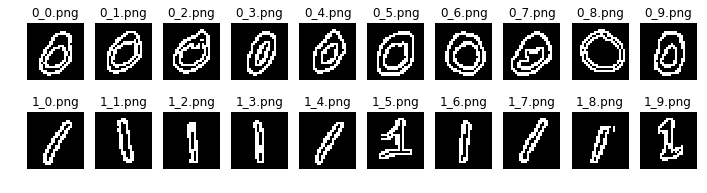

In [4]:
#zim3=np.zeros((im_h, im_w),dtype="int")
#oim3=np.zeros((im_h, im_w),dtype="int")
zim3=deepcopy(zim2)
oim3=deepcopy(oim2)

zim3[:]=0
oim3[:]=0

im_h, im_w = zim2[0].shape



area = 0
count = 0
flag01=1;
th=0.55

for a3 in range(0, n_im):
    #count = count + 1;
    #flag01=0;
    thz = np.amax(zim2[a3])*th
    tho = np.amax(oim2[a3])*th
    #print(thz,tho)
    for a1 in range(0, im_h): #going from top to down, left to right
        for a2 in range(0, im_w):
            if zim2[a3][a1,a2] > thz:
                zim3[a3][a1,a2] = 1;
            if oim2[a3][a1,a2] > tho:
                oim3[a3][a1,a2] = 1;

fig, axes = plt.subplots(2, n_im, figsize=(12, 3))
for ax, nm, a1 in zip(axes[0], zeros_names,range(0,n_im)):
    ax.imshow(zim3[a1], cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, nm, a1 in zip(axes[1], ones_names,range(0,n_im)):
    ax.imshow(oim3[a1], cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

Some morphology to close the gaps in the figures

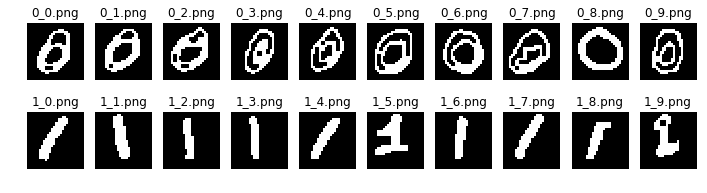

In [5]:

def erode(n,im,imh,imw): # similar to add_neighbours
    for b1 in range(0, imh-n):
        for b2 in range(0, imw-n):
            flagaux=255
            for b3 in range(0, n):
                for b4 in range(0, n):
                    if im[b1+b3, b2+b4] == 0 :
                        flagaux = 0;
                        break
                if flagaux == 0 :
                    break
            im[b1, b2]=flagaux;
    for b1 in range(imh-n, imh):
        for b2 in range(0,imw):
            im[b1, b2] = 0
    for b1 in range(0, imh):
        for b2 in range(imw-n,imw):
            im[b1, b2] = 0
            
def dilate(n,im,imh,imw): # similar to add_neighbours
    for b1 in range(0, imh-n):
        for b2 in range(0, imw-n):
            flagaux=0
            for b3 in range(0, n):
                for b4 in range(0, n):
                    if im[b1+b3, b2+b4] != 0 :
                        flagaux = 255;
            im[b1, b2]=flagaux;
    
def opening(n,im,imh,imw): # similar to add_neighbours
    erode(n,im,imh,imw)
    dilate(n,im,imh,imw)
def closing(n,im,imh,imw): # similar to add_neighbours
    dilate(n,im,imh,imw)
    erode(n,im,imh,imw)
    
for a3 in range(0, n_im):   
    closing(2,zim3[a3],im_h,im_w)
for a3 in range(0, n_im):
    #opening(2,oim3[a3],im_h,im_w)
    closing(3,oim3[a3],im_h,im_w)
    
fig, axes = plt.subplots(2, n_im, figsize=(12, 3))
for ax, nm, a1 in zip(axes[0], zeros_names,range(0,n_im)):
    ax.imshow(zim3[a1], cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, nm, a1 in zip(axes[1], ones_names,range(0,n_im)):
    ax.imshow(oim3[a1], cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

Discovering the border of the figures. Localizing it by going finding the first white pixel in diagonal from the top left corner. From that point, analizing the neighbours going in one of four directions always touching the edge, till it is imposibble to keep going  in that direction, so the direction is changed till the first pixel is reached again. Every pixel found by the edge is added to the contour and the coordinates are stored.

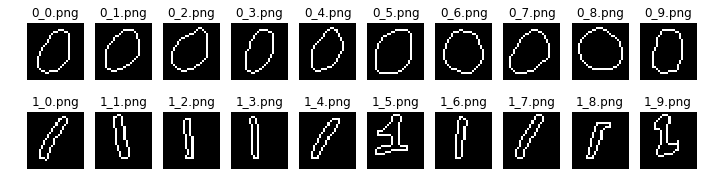

In [6]:
zim4=deepcopy(zim3)
oim4=deepcopy(oim3)

zim4[:]=0
oim4[:]=0

vectors_z = np.zeros((10,2,400),dtype="int")
vectors_o = np.zeros((10,2,400),dtype="int")
counters = np.zeros((2,10),dtype="int")


def upright(iny,inx,im):
    if im[iny-1, inx-1] != 0 :
        return -1,-1
    elif im[iny-1, inx] !=0 :
        return iny-1, inx
    elif im[iny-1, inx+1] !=0 :
        return iny-1, inx+1
    elif im[iny, inx+1] !=0 :
        return iny, inx+1
    else:
        return -1,-1
    
def downright(iny,inx,im):
    if im[iny-1, inx+1] != 0 :
        return -1,-1
    elif im[iny, inx+1] !=0 :
        return iny, inx+1
    elif im[iny+1, inx+1] !=0 :
        return iny+1, inx+1
    elif im[iny+1, inx] !=0 :
        return iny+1, inx
    else:
        return -1,-1

def downleft(iny,inx,im):
    if im[iny+1, inx+1] != 0 :
        return -1,-1
    elif im[iny+1, inx] !=0 :
        return iny+1, inx
    elif im[iny+1, inx-1] !=0 :
        return iny+1, inx-1
    elif im[iny, inx-1] !=0 :
        return iny, inx-1
    else:
        return -1,-1  
    
def upleft(iny,inx,im):
    if im[iny+1, inx-1] != 0 :
        return -1,-1
    elif im[iny, inx-1] !=0 :
        return iny, inx-1
    elif im[iny-1, inx-1] !=0 :
        return iny-1, inx-1
    elif im[iny-1, inx] !=0 :
        return iny-1, inx
    else:
        return -1,-1  

def zero_scan (num):
    if num == 1 :
        return upright(indy,indx,zim3[a3])
    elif num == 2:
        return downright(indy,indx,zim3[a3])
    elif num == 3:
        return downleft(indy,indx,zim3[a3])
    elif num == 4:
        return upleft(indy,indx,zim3[a3])
    else:
        print("error")
        return -1,-1

    
def ones_scan (num):
    if num == 1 :
        return upright(indy,indx,oim3[a3])
    elif num == 2:
        return downright(indy,indx,oim3[a3])
    elif num == 3:
        return downleft(indy,indx,oim3[a3])
    elif num == 4:
        return upleft(indy,indx,oim3[a3])
    else:
        print("error")
        return -1,-1


    
for a3 in range(0, n_im):
    flag01=1
    a4=-1;
    
    while flag01 == 1:
        a4+=1;
        if zim3[a3][a4,a4]!=0:
            flag01=0
    
     

    indx=a4
    indy=a4
    ix0=a4
    iy0=a4
    iauxx=0
    iauxy=0 

    flag01=1
    state = 1
    
    cntx = 0
    while flag01 == 1  and cntx < 200:
        cntx +=1
        iauxy,iauxx=zero_scan(state)
        if iauxy == -1:
            state+=1
            if state == 5:
                state = 1;
        else:
            indx=iauxx
            indy=iauxy
            zim4[a3][indy,indx]=255
            vectors_z[a3,0,counters[0,a3]]=indx
            vectors_z[a3,1,counters[0,a3]]=indy
            counters[0,a3]+=1;
            if indx==ix0 and indy == iy0 :
                  flag01=0  
                    
for a3 in range(0, n_im):
    flag01=1
    a4=-1;
    
    while flag01 == 1:
        a4+=1;
        if oim3[a3][a4,a4]!=0:
            flag01=0

    indx=a4
    indy=a4
    ix0=a4
    iy0=a4
    iauxx=0
    iauxy=0 

    flag01=1
    state = 1
    
    cntx = 0
    while flag01 == 1  and cntx < 200:
        cntx +=1
        iauxy,iauxx=ones_scan(state)
        if iauxy == -1:
            state+=1
            if state == 5:
                state = 1;
        else:
            indx=iauxx
            indy=iauxy
            oim4[a3][indy,indx]=255
            vectors_o[a3,0,counters[1,a3]]=indx
            vectors_o[a3,1,counters[1,a3]]=indy
            counters[1,a3]+=1;
            if indx==ix0 and indy == iy0 :
                  flag01=0  

                    
                    
fig, axes = plt.subplots(2, n_im, figsize=(12, 3))
for ax, nm, a1 in zip(axes[0], zeros_names,range(0,n_im)):
    ax.imshow(zim4[a1], cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, nm, a1 in zip(axes[1], ones_names,range(0,n_im)):
    ax.imshow(oim4[a1], cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
    

To normalize the length of the vectors, they could be cropped or zero padded. The next part is to vizualize the part of the contour that goes into the FFT. The number of points is given by "nF". The figures are not complete because using a smaller number of points gave better results.

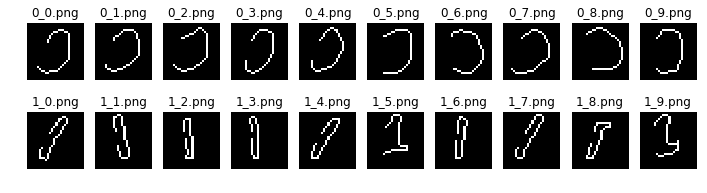

In [7]:
zim5=deepcopy(zim4)
oim5=deepcopy(oim4)

zim5[:]=0
oim5[:]=0

nF=40 #zero padding or truncating for the FFT

for a2 in range(0,n_im):
    for a1 in range(0,nF):
        zim5[a2][vectors_z[a2,1,a1],vectors_z[a2,0,a1]]=255
        oim5[a2][vectors_o[a2,1,a1],vectors_o[a2,0,a1]]=255


fig, axes = plt.subplots(2, n_im, figsize=(12, 3))
for ax, nm, a1 in zip(axes[0], zeros_names,range(0,n_im)):
    ax.imshow(zim5[a1], cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, nm, a1 in zip(axes[1], ones_names,range(0,n_im)):
    ax.imshow(oim5[a1], cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
    

The FFT of each contour is calculated and the magnitud of the 2 first frequencies is displayed in a plane, first frequency as X and the second as Y. The frequency zero is ignored as it only gives location information of the figure. The magnitud of the frequencies is used as the phase will only be related with the orientation of the figure.

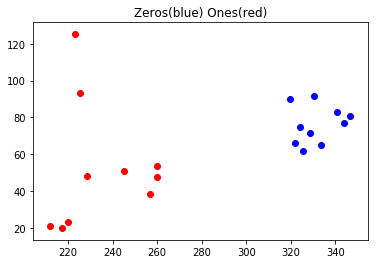

In [8]:
zimV1=np.zeros((n_im,400),dtype="complex");
oimV1=np.zeros((n_im,400),dtype="complex");

freqmin=1
freqmax=freqmin+2

for a1 in range(0,n_im):
    for a2 in range(0,counters[0,a1]):
        zimV1[a1,a2]=np.complex(vectors_z[a1,0,a2],vectors_z[a1,1,a2])
    for a2 in range(0,counters[1,a1]):
        oimV1[a1,a2]=np.complex(vectors_o[a1,0,a2],vectors_o[a1,1,a2])
    
    x=np.fft.fft(zimV1[a1,:counters[0,a1]],n=nF)[freqmin:freqmax]
    plt.scatter(np.absolute(x[0]),np.absolute(x[1]), color='blue')

    x=np.fft.fft(oimV1[a1,:counters[0,a1]],n=nF)[freqmin:freqmax]
    plt.scatter(np.absolute(x[0]),np.absolute(x[1]), color='red')

plt.title("Zeros(blue) Ones(red)")
plt.show()
        
        

It can be seen in the previous image that the zeros(in blue) are nicely clustered in the right, as the lowest frequency should hve a higher amplitud for the ones than the zeros, because of the sharper edges in the ones, the energy will be more spread in the higher frequencies.

For tunning the results, the amplitud of the three first frequencies is displayed. It can be seen that for the first ine, the difference is clear, and a classifier can be selected easily, but for the higher frequencies it could be harder.

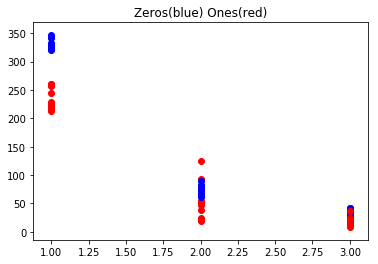

In [9]:
zimV1=np.zeros((n_im,400),dtype="complex");
oimV1=np.zeros((n_im,400),dtype="complex");


freqmin=1
freqmax=freqmin+3

for a1 in range(0,n_im):
    for a2 in range(0,counters[0,a1]):
        zimV1[a1,a2]=np.complex(vectors_z[a1,0,a2],vectors_z[a1,1,a2])
    for a2 in range(0,counters[1,a1]):
        oimV1[a1,a2]=np.complex(vectors_o[a1,0,a2],vectors_o[a1,1,a2])
    
    x=np.fft.fft(zimV1[a1,:counters[0,a1]],n=nF)[freqmin:freqmax]
    plt.scatter(1,np.absolute(x[0]), color='blue')
    plt.scatter(2,np.absolute(x[1]), color='blue')
    plt.scatter(3,np.absolute(x[2]), color='blue')

    x=np.fft.fft(oimV1[a1,:counters[0,a1]],n=nF)[freqmin:freqmax]
    plt.scatter(1,np.absolute(x[0]), color='red')
    plt.scatter(2,np.absolute(x[1]), color='red')
    plt.scatter(3,np.absolute(x[2]), color='red')
      
plt.title("Zeros(blue) Ones(red)")
plt.show()

The fourier descriptor are a powerfull tool for classification, as the operations have features that are usefull for different scenarios, as having the image rotated 180 degress, and the results shuld be similar.

### 1.3 Additional method(s)
Add your implementation and discussion